In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import combinations
from collections import Counter

In [2]:
# Read csv file
df = pd.read_csv("data/salesData.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [3]:
# Cleaning data
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 6.4+ MB


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [4]:
# Drop duplicates
df.drop_duplicates()
df_cleaned = df.dropna()

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 6.4+ MB


In [6]:
# Converting columns to proper types
df_cleaned['Quantity Ordered'] = pd.to_numeric(df_cleaned['Quantity Ordered'])
df_cleaned['Price Each'] = pd.to_numeric(df_cleaned['Price Each'])

In [7]:
# Add month column
df_cleaned['Month'] = pd.to_datetime(df_cleaned['Order Date']).dt.month
df_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559.0,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560.0,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560.0,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561.0,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
# Getting city from address
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df_cleaned['City'] = df_cleaned['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558.0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559.0,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
2,176560.0,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
3,176560.0,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176561.0,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [9]:
# Month with most sales
df_cleaned['Sales'] = df_cleaned['Quantity Ordered'].astype('int') * df_cleaned['Price Each'].astype('float')
summary = df_cleaned.drop('Order ID', axis = 1).groupby('Month').sum(numeric_only = True)
summary

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


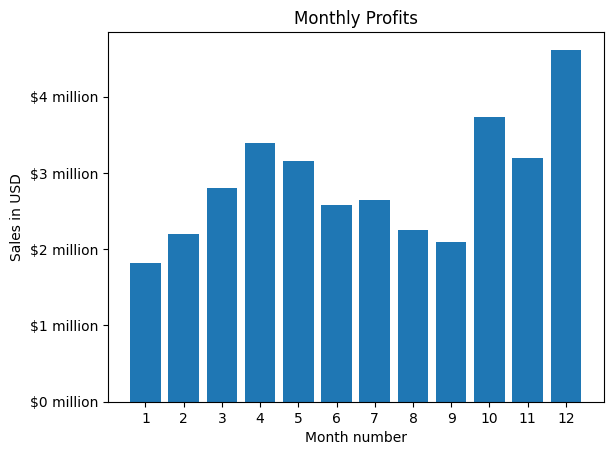

In [10]:
# Plot with sales from each month
months = range(1,13)
plt.bar(months, df_cleaned.groupby(['Month']).sum(numeric_only = True)['Sales'])
plt.xticks(months)

def millions_formatter(x, pos):
    return f'${x/1e6:.0f} million'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.title('Monthly Profits')
plt.show()

In [11]:
# City with most sold products
df_cleaned.drop('Order ID', axis = 1).groupby(['City']).sum(numeric_only = True)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


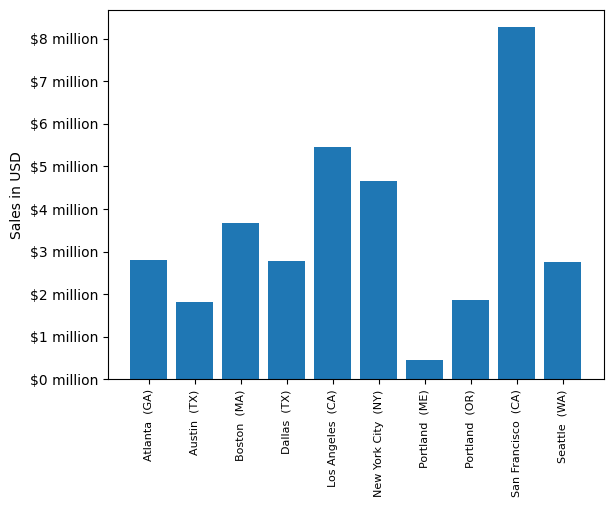

In [12]:
# Plot presenting cities with most sales
keys = [city for city, df in df_cleaned.groupby('City')]

plt.bar(keys, df_cleaned.groupby('City').sum(numeric_only = True)['Sales'])

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.ylabel('Sales in USD')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [13]:
# What time is best to display advertisements
df_cleaned['Hour'] = pd.to_datetime(df_cleaned['Order Date']).dt.hour
df_cleaned['Minute'] = pd.to_datetime(df_cleaned['Order Date']).dt.minute
df_cleaned['Count'] = 1
df_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558.0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
1,176559.0,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
2,176560.0,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
3,176560.0,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
4,176561.0,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


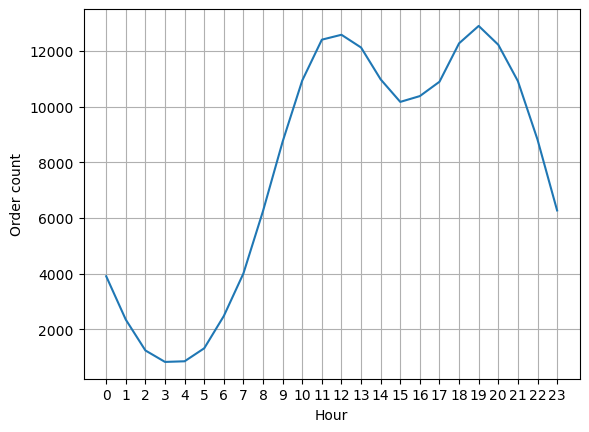

In [14]:
# Plot presenting orders count by each hour
keys = [pair for pair, df in df_cleaned.groupby('Hour')]

plt.plot(keys, df_cleaned.groupby('Hour').count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel('Order count')
plt.grid()
plt.show()

In [15]:
# Products that were most often sold together
df_cleaned['Grouped'] = df_cleaned.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df_cleaned[['Order ID', 'Grouped']].drop_duplicates()

In [16]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


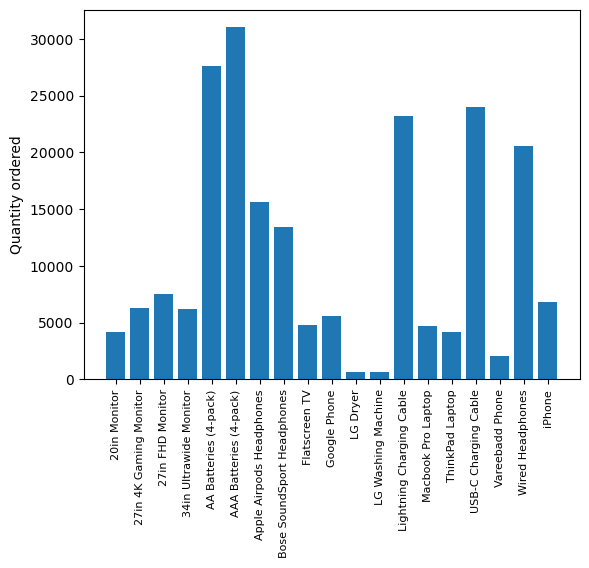

In [17]:
# Products that were sold in the highest volume
product_group = df_cleaned.groupby('Product')
quantity_ordered = product_group.sum(numeric_only = True)['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Quantity ordered')
plt.show()

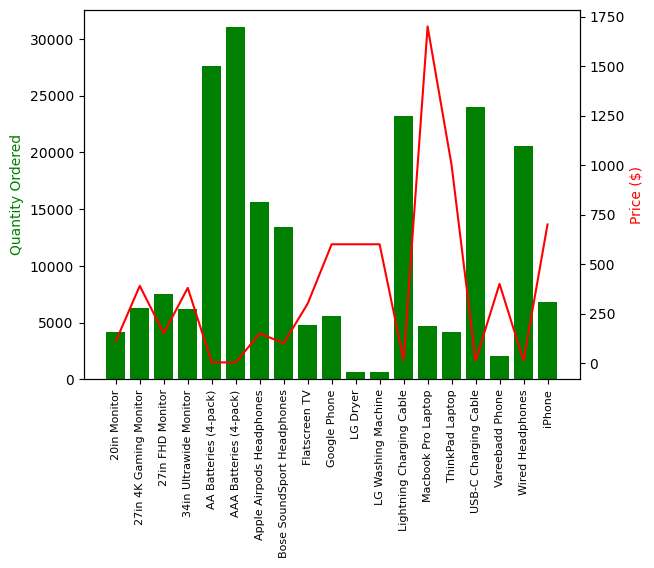

In [18]:
# Products that were sold in the highest volume with their price per unit
prices = df_cleaned.groupby('Product').mean(numeric_only = True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color = 'g')
ax2.plot(keys, prices, color = 'r')

ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'r')

ax1.set_xticks(keys)
ax1.set_xticklabels(keys, rotation = 90, size = 8)

plt.show()